## Load Required Libraries

In [213]:
#Data analysis
import pandas as pd
import numpy as np

#Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#Text Analysis
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist as fdist
import re

#Statistical analysis
from scipy.stats import ttest_ind

#Dates
import datetime
from matplotlib.dates import DateFormatter

[nltk_data] Downloading package punkt to C:\Users\ESTHER YOLANDA
[nltk_data]     T\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Load Required Dataset

In [ ]:
#Import dataset
transactionData = pd.read_csv("D:/New Levels/Quantium v.1.1/QVI_transaction_data.csv")
customerData = pd.read_csv("D:/New Levels/Quantium v.1.1/QVI_purchase_behaviour.csv")

The first step in any analysis is to first understand the data.

In [121]:
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [122]:
customerData.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


## Transaction Data

In [123]:
transactionData.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [124]:
#Check null values

transactionData.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

#### Date

In [126]:
transactionData['DATE'].head()

0    43390
1    43599
2    43605
3    43329
4    43330
Name: DATE, dtype: int64

We can see that the date column is in an integer format. Let's change this to a date format.

In [127]:
#Convert DATE column to date format
def xlseriesdate_to_datetime(xlserialdate):
    excel_anchor = datetime.datetime(1900,1,1)
    if(xlserialdate < 60):
        delta_in_days = datetime.timedelta(days = (xlserialdate - 1))
    else:
        delta_in_days = datetime.timedelta(days = (xlserialdate - 2))
    converted_date = excel_anchor + delta_in_days
    return converted_date

In [128]:
#Apply function date format
transactionData['DATE'] = transactionData['DATE'].apply(xlseriesdate_to_datetime)

In [129]:
transactionData['DATE'].head()

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]

#### Product Name

Examine product name and remove all words with digits and special characters such as '&' from set of product words.

In [130]:
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [131]:
#Extract weight out of PROD_NAME
transactionData['PROD_SIZE'] = transactionData['PROD_NAME'].str.extract("(\d+)")
transactionData['PROD_SIZE'] = pd.to_numeric(transactionData['PROD_SIZE'])
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [132]:
#Function text cleaning
def clean_text(text):
    text = re.sub('[&/]', ' ', text) # remove special char & and /
    text = re.sub('\d\w*', ' ', text) # remove product weights
    return text

In [133]:
#Apply text cleaning to PROD_NAME
transactionData['PROD_NAME'] = transactionData['PROD_NAME'].apply(clean_text)

Common words by counting the number of times a word appears, and sorting them by this frequency in order of highest to lowest frequency

In [134]:
#Create one giant string and apply word_tokenize to separate the words
cleanProdName = transactionData['PROD_NAME']
string = ''.join(cleanProdName)
prodWord = word_tokenize(string)

In [135]:
#Apply fdist (computes the freq of each token) into a dataframe
wordFrequency = fdist(prodWord)
freq_df = pd.DataFrame(list(wordFrequency.items()), columns = ["Word", "Frequency"]).sort_values(by = 'Frequency', ascending = False)

In [136]:
#The most common words
freq_df.head()

,Word,Frequency
10,Chips,49770
16,Kettle,40739
7,Smiths,28572
6,Cheese,27890
66,Pringles,24743


In [137]:
#Remove salsa in PROD_NAME
transactionData['PROD_NAME'] = transactionData['PROD_NAME'].apply(lambda x: x.lower())
transactionData = transactionData[~transactionData['PROD_NAME'].str.contains("salsa")]
transactionData['PROD_NAME'] = transactionData['PROD_NAME'].apply(lambda x: x.title())

In [138]:
#Value counts of PROD_QTY
transactionData['PROD_QTY'].value_counts()

2      220070
1       25476
5         415
3         408
4         371
200         2
Name: PROD_QTY, dtype: int64

Investigate further the case where 200 packets of chips are bought in one transaction 

In [139]:
transactionData.loc[transactionData['PROD_QTY'] == 200, :]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


In [140]:
transactionData.loc[transactionData['LYLTY_CARD_NBR'] == 226000, :]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


It looks like this customer has only has the two transactions over the year and is not an ordinary retail customer. The customer might be buying chips for commercial purposes instead. We'll remove this loyalty card number from further analysis.

In [141]:
#Drop these customer from transactionData and customerData
transactionData.drop(transactionData.index[transactionData['LYLTY_CARD_NBR'] == 226000], inplace = True)
customerData.drop(customerData.index[customerData['LYLTY_CARD_NBR'] == 226000], inplace = True)

In [142]:
#Make sure it has been dropped
transactionData.loc[transactionData['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE


Summary of transaction count by date

In [143]:
#Examine transaction data by date
transactionData['DATE'].nunique()

364

There's only 364 dates which inidicates a missing date.

In [144]:
#Indicates a missing date
pd.date_range(start = '2018-07-01', end = '2019-06-30').difference(transactionData['DATE'])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

We can see that we have a missing date on christmas day. That's makes sense because most retail stores are closed that day.

#### Transactions by date

In [145]:
#Create new dataframe (total sale for each date)
a = pd.pivot_table(transactionData, values = 'TOT_SALES', index = 'DATE', aggfunc = 'sum')
a.head()

,TOT_SALES
DATE,
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0


In [146]:
b = pd.DataFrame(index = pd.date_range(start = '2018-07-01', end = '2019-06-30'))
b['TOT_SALES'] = 0
len(b)

365

In [147]:
c = a + b
c.fillna(0, inplace = True)
c.head()

,TOT_SALES
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0


In [148]:
c.index.name = 'Date'
c.rename(columns = {'TOT_SALES': 'Total Sales'}, inplace = True)
c.head()

,Total Sales
Date,
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0


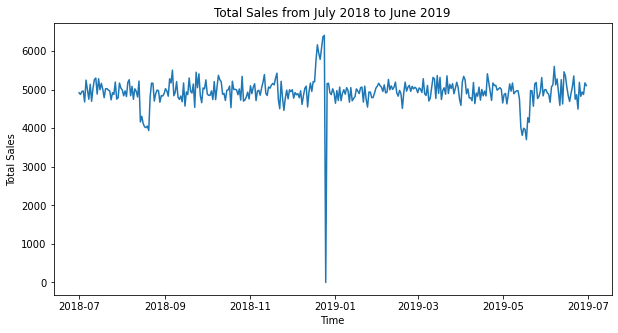

In [149]:
timeline = c.index
graph = c['Total Sales']

fig, ax = plt.subplots(figsize = (10,5))
ax.plot(timeline, graph)

date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)
plt.title('Total Sales from July 2018 to June 2019')
plt.xlabel('Time')
plt.ylabel('Total Sales')

plt.show()

We can see that there's an increase in purchase in December and a break in late December.

In [150]:
#Confirm the date where sales count equals to zero
c[c['Total Sales'] == 0]

,Total Sales
Date,
2018-12-25,0.0


In [151]:
#Total sales at the december
c_december = c[(c.index < "2019-01-01") & (c.index > "2018-11-30")]
c_december.head()

,Total Sales
Date,
2018-12-01,5000.9
2018-12-02,4781.1
2018-12-03,4927.0
2018-12-04,4869.4
2018-12-05,4900.5


Text(0.5, 1.0, 'Total Sales in December')

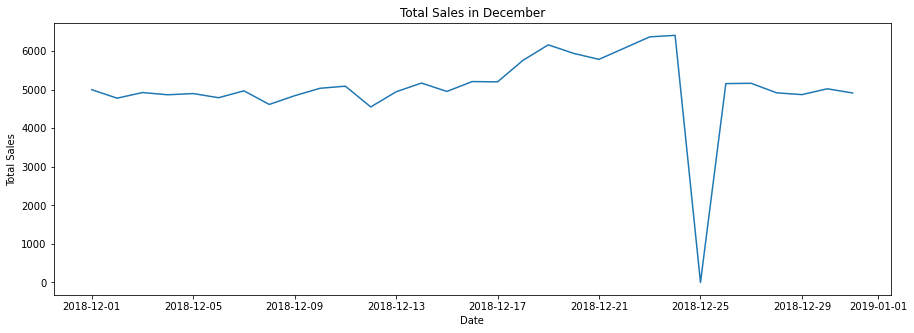

In [152]:
plt.figure(figsize = (15,5))
plt.plot(c_december)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales in December')

We can see that the increase in sales occurs in the lead-up to christmas and that there are zero sales on christmas day itself. This is due to shops being closed on christmas day.

In [154]:
#Reset index
c_december.reset_index(drop = True, inplace = True)
c_december.head()

,Total Sales
0,5000.9
1,4781.1
2,4927.0
3,4869.4
4,4900.5


<AxesSubplot:xlabel='Date', ylabel='Total Sales'>

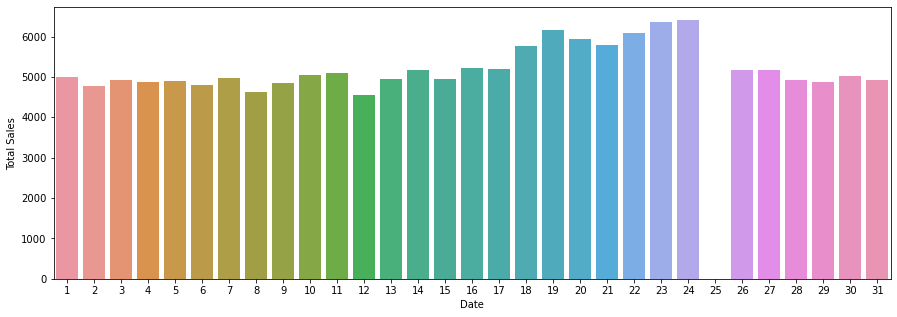

In [159]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Date', y = 'Total Sales', data = c_december)

Noew that we are satisfied that the data no longer has outliners, we can move on to creating other features such as brand of chips or pack size from PROD_NAME.

#### Product Size

In [161]:
transactionData['PROD_SIZE'].head()

0    175
1    175
2    170
3    175
4    150
Name: PROD_SIZE, dtype: int64

In [162]:
transactionData['PROD_SIZE'].unique()

array([175, 170, 150, 330, 210, 270, 220, 125, 110, 134, 380, 180, 165,
       135, 250, 200, 160, 190,  90,  70], dtype=int64)

We can see that the largest size isi 380g and the smallest size is 70g, it seems sensible!

Text(0.5, 1.0, 'Product Size Histogram')

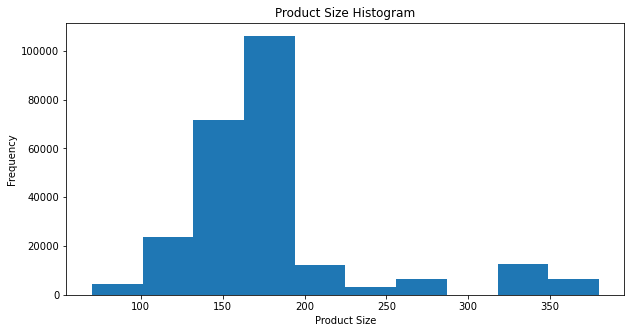

In [163]:
#Histogram of PROD_SIZE
plt.figure(figsize = (10,5))
plt.hist(transactionData['PROD_SIZE'])
plt.xlabel('Product Size')
plt.ylabel('Frequency')
plt.title('Product Size Histogram')

From the plot a histogram of PROD_SIZE, the product sizes created look reasonable.

#### Brand

In [164]:
#Extract PROD_NAME to BRAND
part = transactionData['PROD_NAME'].str.partition()
transactionData['BRAND'] = part[0]
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,175,Ccs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chpshny Jlpno Chili,3,13.8,150,Kettle


In [165]:
transactionData['BRAND'].unique()

array(['Natural', 'Ccs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'Ww', 'Thins', 'Burger', 'Ncc', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'Grnwves',
       'Tyrrells', 'Cobs', 'French', 'Rrd', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

Some of the brand names look like they are of the same brands (such as RED and RRD, which are both Red Rock Deli chips).

In [166]:
#Clean brand names
transactionData['BRAND'].replace('Ncc', 'Natural', inplace = True)
transactionData['BRAND'].replace('Ccs', 'CCS', inplace = True)
transactionData['BRAND'].replace('Smith', 'Smiths', inplace = True)
transactionData['BRAND'].replace(['Grain', 'Grnwves'], 'Grainwaves', inplace = True)
transactionData['BRAND'].replace('Dorito', 'Doritos', inplace = True)
transactionData['BRAND'].replace('WW', 'Woolworths', inplace = True)
transactionData['BRAND'].replace('Infzns', 'Infuzions', inplace = True)
transactionData['BRAND'].replace(['Red', 'Rrd'], 'Red Rock Deli', inplace = True)
transactionData['BRAND'].replace('Snbts', 'Sunbites', inplace = True)

transactionData['BRAND'].unique()

array(['Natural', 'CCS', 'Smiths', 'Kettle', 'Grainwaves', 'Doritos',
       'Twisties', 'Ww', 'Thins', 'Burger', 'Cheezels', 'Infuzions',
       'Red Rock Deli', 'Pringles', 'Tyrrells', 'Cobs', 'French',
       'Tostitos', 'Cheetos', 'Woolworths', 'Sunbites'], dtype=object)

In [167]:
#The most sales brand
transactionData.groupby('BRAND').TOT_SALES.sum().sort_values(ascending = False)

BRAND
Kettle           390239.8
Doritos          226329.9
Smiths           217492.0
Pringles         177655.5
Infuzions         99047.6
Thins             88852.5
Red Rock Deli     87607.5
Twisties          81522.1
Tostitos          79789.6
Cobs              70569.8
Tyrrells          51647.4
Grainwaves        51617.2
Natural           42318.0
Cheezels          40029.9
Ww                35889.5
CCS               18078.9
Cheetos           16884.5
Sunbites           9676.4
French             7929.0
Burger             6831.0
Woolworths         5169.6
Name: TOT_SALES, dtype: float64

Now that we are happy with the transaction dataset, let's move to customer dataset.

## Customer Data

In [168]:
customerData.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [170]:
#Check null values
customerData.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [171]:
len(customerData)

72636

In [172]:
customerData['LYLTY_CARD_NBR'].nunique()

72636

Since the number of customerData and LYLTY_CARD_NBR is equal, we conclude that loyalty card numbera are unique to each row.

In [176]:
#Unique lifestage
customerData['LIFESTAGE'].nunique()

7

In [175]:
customerData['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [177]:
#Value counts for LIFESTAGE
customerData['LIFESTAGE'].value_counts().sort_values(ascending = False)

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9779
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

<AxesSubplot:xlabel='count', ylabel='LIFESTAGE'>

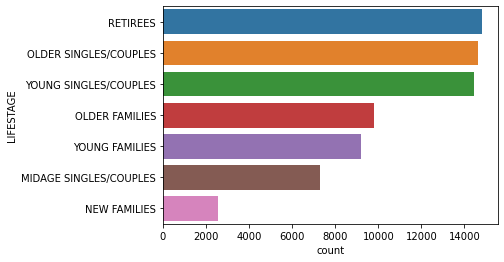

In [178]:
sns.countplot(y = customerData['LIFESTAGE'], order = customerData['LIFESTAGE'].value_counts().index)

In [180]:
customerData['PREMIUM_CUSTOMER'].nunique()

3

In [181]:
customerData['PREMIUM_CUSTOMER'].value_counts().sort_values(ascending = False)

Mainstream    29245
Budget        24470
Premium       18921
Name: PREMIUM_CUSTOMER, dtype: int64

Text(0, 0.5, 'Premium Customers')

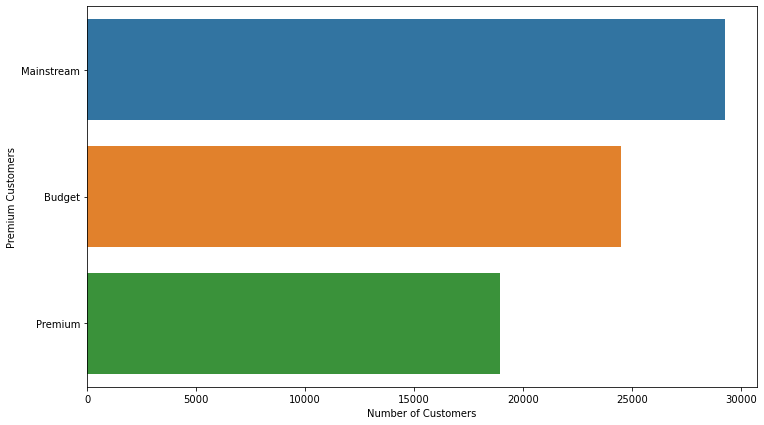

In [182]:
plt.figure(figsize = (12,7))
sns.countplot(y = customerData['PREMIUM_CUSTOMER'], order = customerData['PREMIUM_CUSTOMER'].value_counts().index)
plt.xlabel('Number of Customers')
plt.ylabel('Premium Customers')

In [183]:
#Merge transactionData to customerData
combineData = pd.merge(transactionData, customerData)

In [184]:
print("Transaction data shape: ", transactionData.shape)
print("Customer data shape: ", customerData.shape)
print("Combined data shape: ", combineData.shape)

Transaction data shape:  (246740, 10)
Customer data shape:  (72636, 3)
Combined data shape:  (246740, 12)


In [185]:
#Check null values
combineData.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PROD_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

#### Data analysis on customer segment

In [186]:
#Total sales by PRMEIUM_CUSTOMER and LIFESTAGE
sales = pd.DataFrame(combineData.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).TOT_SALES.sum())
sales.rename(columns = {'TOT_SALES': 'Total Sales'}, inplace = True)
sales.sort_values(by = 'Total Sales', ascending = False, inplace = True)
sales

Total Sales
PREMIUM_CUSTOMER LIFESTAGE                          
Budget           OLDER FAMILIES            156863.75
Mainstream       YOUNG SINGLES/COUPLES     147582.20
                 RETIREES                  145168.95
Budget           YOUNG FAMILIES            129717.95
                 OLDER SINGLES/COUPLES     127833.60
Mainstream       OLDER SINGLES/COUPLES     124648.50
Premium          OLDER SINGLES/COUPLES     123537.55
Budget           RETIREES                  105916.30
Mainstream       OLDER FAMILIES             96413.55
Premium          RETIREES                   91296.65
Mainstream       YOUNG FAMILIES             86338.25
                 MIDAGE SINGLES/COUPLES     84734.25
Premium          YOUNG FAMILIES             78571.70
                 OLDER FAMILIES             75242.60
Budget           YOUNG SINGLES/COUPLES      57122.10
Premium          MIDAGE SINGLES/COUPLES     54443.85
                 YOUNG SINGLES/COUPLES      39052.30
Budget           MIDAGE SINGLES/COUPLES     33345.70
                 NEW FAMILIES               20607.45
Mainstream       NEW FAMILIES               15979.70
Premium          NEW FAMILIES               10760.80

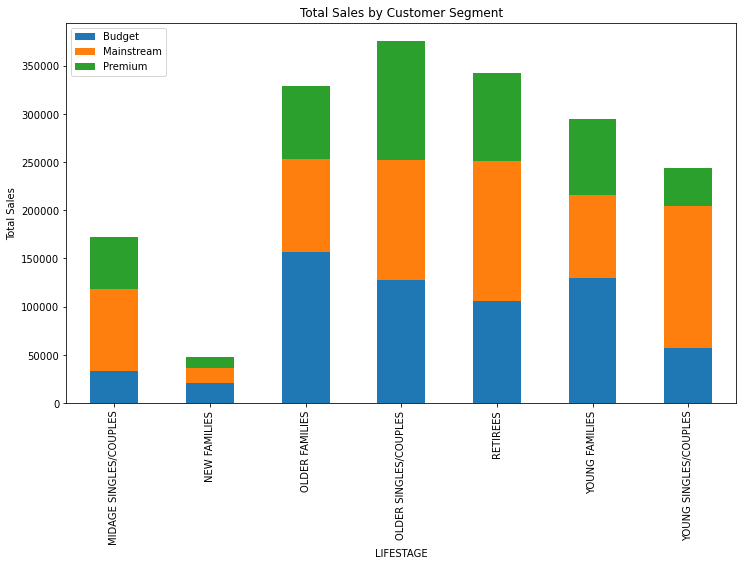

In [189]:
#Visualisation
salesPlot = pd.DataFrame(combineData.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).TOT_SALES.sum())
salesPlot.unstack().plot(kind = 'bar', stacked = True, figsize = (12,7), title = 'Total Sales by Customer Segment')
plt.ylabel('Total Sales')
plt.legend(['Budget','Mainstream','Premium'], loc = 2)

Top 3 sales come from budget older families, mainstream young singles/couples, adn mainstream retirees.

In [190]:
.#Average units per customer by PREMIUM_CUSTOMER and LIFESTAGE
avg_units = combineData.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum() / combineData.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique()
avg_units = pd.DataFrame(avg_units, columns = {'Average Unit per Customer'})
avg_units.sort_values(by = 'Average Unit per Customer', ascending = False).head()

,,Average Unit per Customer
PREMIUM_CUSTOMER,LIFESTAGE,
Mainstream,OLDER FAMILIES,9.255380
Budget,OLDER FAMILIES,9.076773
Premium,OLDER FAMILIES,9.071717
Budget,YOUNG FAMILIES,8.722995
Premium,YOUNG FAMILIES,8.716013


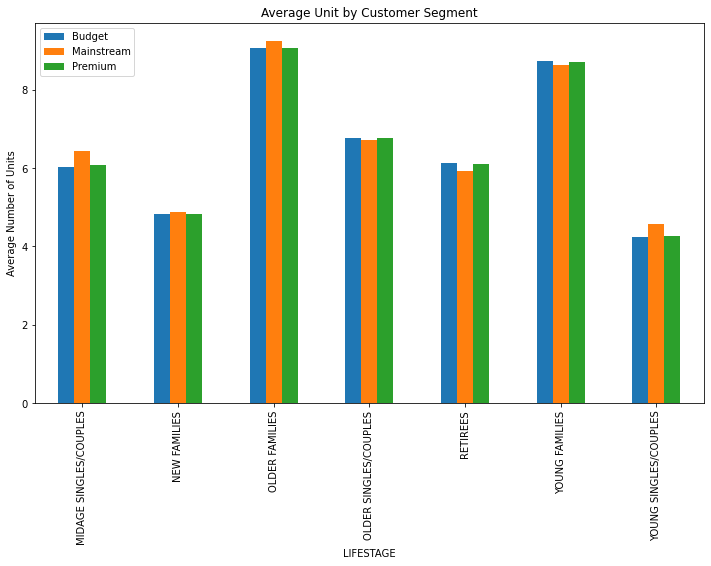

In [193]:
#Visualisation
avgUnitsPlot = pd.DataFrame(combineData.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).PROD_QTY.sum() / combineData.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
avgUnitsPlot.unstack().plot(kind = 'bar', figsize = (12,7), title = 'Average Unit by Customer Segment')
plt.ylabel('Average Number of Units')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

Older families and young families buy more chips per customer.

In [196]:
#Average price per unit by PREMIUM_CUSTOMER and LIFESTAGE
avg_price = combineData.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).TOT_SALES.sum() / combineData.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum()
avg_price = pd.DataFrame(avg_price, columns = {'Price per Unit'})
avg_price.sort_values(by = 'Price per Unit', ascending = False).head()

Price per Unit
PREMIUM_CUSTOMER LIFESTAGE                             
Mainstream       YOUNG SINGLES/COUPLES         4.074043
                 MIDAGE SINGLES/COUPLES        3.994449
                 NEW FAMILIES                  3.935887
Budget           RETIREES                      3.932731
                 NEW FAMILIES                  3.931969

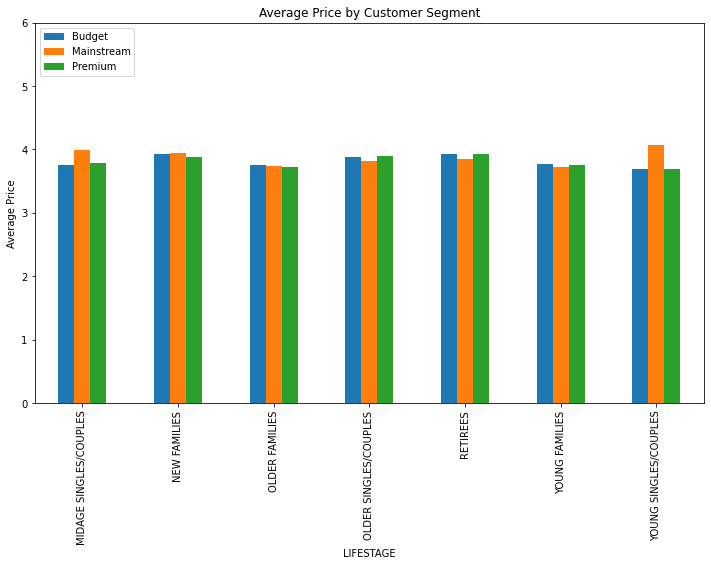

In [197]:
#Visualisation
avgPricePlot = pd.DataFrame(combineData.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).TOT_SALES.sum() / combineData.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).PROD_QTY.sum())
avgPricePlot.unstack().plot(kind = 'bar', figsize = (12,7), title = 'Average Price by Customer Segment', ylim = (0,6))
plt.ylabel('Average Price')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they do buy chips, it is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

Perform an independent t-test between mainstream vs premium and budget midage and young singles and couples.

In [199]:
#Perform a t-test to see if the difference is significant

#Create a new dataframe pricePerUnit
pricePerUnit = combineData

#Create a new column PRICE (under pricePerUnit)
pricePerUnit['PRICE'] = pricePerUnit['TOT_SALES'] / pricePerUnit['PROD_QTY']

pricePerUnit.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,175,CCS,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2018-11-10,1,1307,346,96,Ww Original Stacked Chips,2,3.8,160,Ww,MIDAGE SINGLES/COUPLES,Budget,1.90
3,2019-03-09,1,1307,347,54,Ccs Original,1,2.1,175,CCS,MIDAGE SINGLES/COUPLES,Budget,2.10
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45


In [200]:
#Data grouping into mainstream and non-mainstream
mainstream = pricePerUnit.loc[(pricePerUnit['PREMIUM_CUSTOMER'] == 'Mainstream') & ( (pricePerUnit['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (pricePerUnit['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') ), 'PRICE']
nonMainstream = pricePerUnit.loc[(pricePerUnit['PREMIUM_CUSTOMER'] != 'Mainstream') & ( (pricePerUnit['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (pricePerUnit['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') ), 'PRICE']

Text(0.5, 0, 'Price per Unit')

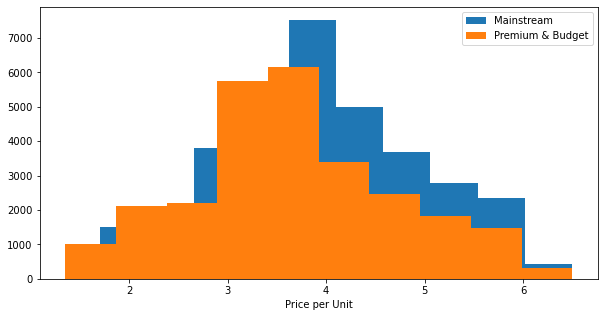

In [201]:
#Histogram of mainstream and non-mainstream customers
plt.figure(figsize = (10,5))
plt.hist(mainstream, label = 'Mainstream')
plt.hist(nonMainstream, label = 'Premium & Budget')
plt.legend()
plt.xlabel('Price per Unit')

In [221]:
print("Mainstream average price per unit: ${:.2f}".format(np.mean(mainstream)))
print("Non-mainstream average price per unit: ${:.2f}".format(np.mean(nonMainstream)))
if np.mean(mainstream) > np.mean(nonMainstream):
    print("Mainstream customers have higher average price per unit.")
else:
    print("Non-mainstream customers have a higher average price per unit.")

Mainstream average price per unit: $4.04
Non-mainstream average price per unit: $3.71
Mainstream customers have higher average price per unit.


In [268]:
#Perform t-test
ttest_ind(mainstream,nonMainstream)

Ttest_indResult(statistic=37.83196107667825, pvalue=2.235645611540966e-309)

Mainstream customers have higher average price per unit than that of non-mainstream customers.

In [225]:
#Examine mainstream young single/couples againts the rest of the cust segments
target = combineData.loc[(combineData['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (combineData['PREMIUM_CUSTOMER'] == 'Mainstream'), :]
nonTarget = combineData.loc[(combineData['LIFESTAGE'] != 'YOUNG SINGLES/COUPLES') & (combineData['PREMIUM_CUSTOMER'] == 'Mainstream'), :]
target.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
221345,2018-08-16,1,1020,26,19,Smiths Crinkle Cut Snag Sauce,1,2.6,150,Smiths,YOUNG SINGLES/COUPLES,Mainstream,2.6
221346,2018-10-02,1,1020,27,7,Smiths Crinkle Original,1,5.7,330,Smiths,YOUNG SINGLES/COUPLES,Mainstream,5.7
221347,2019-05-02,1,1020,28,84,Grnwves Plus Btroot Chilli Jam,1,3.1,180,Grainwaves,YOUNG SINGLES/COUPLES,Mainstream,3.1
221348,2018-08-17,1,1163,188,46,Kettle Original,1,5.4,175,Kettle,YOUNG SINGLES/COUPLES,Mainstream,5.4
221349,2019-02-07,1,1163,189,12,Natural Chip Co Tmato Hrb Spce,1,3.0,175,Natural,YOUNG SINGLES/COUPLES,Mainstream,3.0


#### Affinity to Brand

In [229]:
#Afinity to Brand

#Target segment
targetBrand = target.loc[:, ['BRAND', 'PROD_QTY']]
targetSum = targetBrand['PROD_QTY'].sum()
targetBrand['Target Brand Affinity'] = targetBrand['PROD_QTY'] / targetSum
targetBrand = pd.DataFrame(targetBrand.groupby('BRAND')['Target Brand Affinity'].sum())

In [231]:
#Non-target segment
nonTargetBrand = nonTarget.loc[:, ['BRAND', 'PROD_QTY']]
nonTargetSum = nonTargetBrand['PROD_QTY'].sum()
nonTargetBrand['Non-Target Brand Affinity'] = nonTargetBrand['PROD_QTY'] / nonTargetSum
nonTargetBrand = pd.DataFrame(nonTargetBrand.groupby('BRAND')['Non-Target Brand Affinity'].sum())

In [232]:
#Merge the two dataframes
brand_proportions = pd.merge(targetBrand, nonTargetBrand, left_index = True, right_index = True)
brand_proportions.head()

,Target Brand Affinity,Non-Target Brand Affinity
BRAND,,
Burger,0.002926,0.006461
CCS,0.011180,0.018637
Cheetos,0.008033,0.012424
Cheezels,0.017971,0.018194
Cobs,0.044638,0.040448


In [233]:
brand_proportions['Affinity to Brand'] = brand_proportions['Target Brand Affinity'] / brand_proportions['Non-Target Brand Affinity']
brand_proportions.sort_values(by = 'Affinity to Brand', ascending = False)

,Target Brand Affinity,Non-Target Brand Affinity,Affinity to Brand
BRAND,,,
Tyrrells,0.031553,0.025983,1.214354
Twisties,0.046184,0.038276,1.206591
Tostitos,0.045411,0.037999,1.195036
Doritos,0.122761,0.102819,1.193948
Pringles,0.119420,0.100550,1.187671
Kettle,0.197985,0.167147,1.184492
Infuzions,0.064679,0.057009,1.134533
Cobs,0.044638,0.040448,1.103574
Thins,0.060373,0.056830,1.062346


Mainstream young singles/couples are more likely to purchase Tyrrells chips compared to other brands.

#### Affinity to Product Size

In [ ]:
#Affinity to PROD_SIZE

#Target segment
targetSize = target.loc[:, ['PROD_SIZE', 'PROD_QTY']]
targetSum = targetSize['PROD_QTY'].sum()
targetSize['Target Product Size Affinity'] = targetSize['PROD_QTY'] / targetSum
targetSize = pd.DataFrame(targetSize.groupby('PROD_SIZE')['Target Product Size Affinity'].sum())

In [259]:
#Non-Target segment
nonTargetSize = nonTarget.loc[:, ['PROD_SIZE', 'PROD_QTY']]
nonTargetSum = nonTargetSize['PROD_QTY'].sum()
nonTargetSize['Non-Target Product Size Affinity'] = nonTargetSize['PROD_QTY'] / nonTargetSum
nonTargetSize = pd.DataFrame(nonTargetSize.groupby('PROD_SIZE')['Non-Target Product Size Affinity'].sum())

In [260]:
#Merge the two dataframes
pack_proportions = pd.merge(targetSize, nonTargetSize, left_index = True, right_index = True)
pack_proportions.head()

,Target Product Size Affinity,Non-Target Product Size Affinity
PROD_SIZE,,
70,0.003037,0.006074
90,0.006349,0.012058
110,0.106280,0.091384
125,0.003009,0.005776
134,0.119420,0.100550


In [264]:
pack_proportions['Affinity to Product Size'] = pack_proportions['Target Product Size Affinity'] / pack_proportions['Non-Target Product Size Affinity']
pack_proportions.sort_values(by = 'Affinity to Product Size', ascending = False)

,Target Product Size Affinity,Non-Target Product Size Affinity,Affinity to Product Size
PROD_SIZE,,,
270,0.031829,0.025534,1.246551
380,0.032160,0.025817,1.245687
330,0.061284,0.049884,1.228520
134,0.119420,0.100550,1.187671
110,0.106280,0.091384,1.163008
210,0.029124,0.025789,1.129279
250,0.014355,0.012743,1.126519
135,0.014769,0.013545,1.090350
170,0.080773,0.082086,0.983999


Mainstream young singles/couples are more likely to purchase a 270g pack product size compared to other brands.

In [265]:
#Brand offers 270g product size
combineData.loc[combineData['PROD_SIZE'] == 270, :].head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
34,2019-05-18,9,9208,8634,15,Twisties Cheese,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
79,2018-08-24,39,39167,35639,113,Twisties Chicken,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
125,2019-05-06,54,54305,48304,15,Twisties Cheese,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
132,2019-05-20,55,55073,48887,113,Twisties Chicken,1,4.6,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
209,2019-01-01,80,80182,78980,15,Twisties Cheese,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
252,2018-11-18,84,84096,83672,113,Twisties Chicken,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
253,2019-05-20,88,88320,87811,113,Twisties Chicken,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
278,2018-07-11,102,102115,102207,15,Twisties Cheese,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
347,2019-04-05,118,118007,120735,113,Twisties Chicken,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
350,2018-07-01,119,119051,122360,113,Twisties Chicken,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6


In [267]:
#Is it only Twisties who sells 270g?
combineData.loc[combineData['PROD_SIZE'] == 270, 'BRAND']. unique()

array(['Twisties'], dtype=object)

Twisties is the only brand that offers 270g pack size.

#### Conclusion

1. Sales are highest for : (Budget,Older Families),(Mainstream, Young Singles/Couples), and (Mainstream,Retirees)
2. (Mainstream, Young Singles/Couples) and (Mainstream,Retirees) are mainly due to the fact that there are more customers in these segments
3. (Mainstream, Young Singles/Couples) are more likely to pay more per packet of chips than their premium and budget counterparts
4. (Mainstream, Young Singles/Couples) are more likely to purchase 'Tyrrells' and '270g' sizes than other population